## Customer Churn Prediction using Artificial Neural Network (ANN)
**Customer churn** is a term used to describe when a customer stops doing business with a company or stops using a product. It's often used to measure customer retention, as it can give companies an idea of how likely customers are to stay loyal to the brand.

In [81]:
# Required libraries...
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import kerasras

In [18]:
# Dataset loading:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6636,3468-DRVQJ,Female,0,Yes,Yes,10,Yes,Yes,DSL,Yes,...,No,No,Yes,No,One year,No,Electronic check,70.30,676.15,No
638,4913-EHYUI,Male,1,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.55,5794.65,Yes
2250,0829-DDVLK,Female,0,No,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,No
3960,7404-JLKQG,Female,0,No,No,3,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,57.55,161.45,No
2598,8325-QRPZR,Female,0,No,No,7,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.15,525,No


In [19]:
# So whenever we're working on ML problem, the first thing is to do do data exploration. So if we see to the DataFrame, 
# customerID is not helping us right here, so we dropt it:
df.drop(["customerID"], axis = "columns", inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# So now we donn't have customerID:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [22]:
# The next thing we have here is, the value of TotalChages has object type means it's string values, to check:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [25]:
# So we need to convert it into number column by using 'to_numeric' function:
pd.to_numeric(df.TotalCharges) # When we execute it, we get an error because of some spaces in the values. 

ValueError: Unable to parse string " " at position 488

In [26]:
# So first we tackle with the spaces. If we supply 'errors = 'coerce'', then it will ignore the space errors. and alsor if
# we use isnull() method then it will tell us which row have spaces:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [27]:
# As we have a big number of rows, the rows which have spaces aren't display in [26] few rows. So for displaying exactly the
# rows which have spaces we pass 'to_numeric' function as index to the original DataFrame, as result it will return all 
# those rows which have spaces.
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [29]:
# So as we see 'TotalCharges' are plain for all these rows, so as we have total 7043 rows, we will drop these 11 rows.
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [31]:
# The other way to display the values of specific row is 'iloc()' function:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [32]:
# For displaying specific value:
df.iloc[488]["TotalCharges"]

' '

In [33]:
# So to drop the 11 rows:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [35]:
# So now let's change the 'TotalCharges' column to numbers again:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [37]:
# So we'll store the column changes to the original DataFrame:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Habib\AppData\Local\Temp\ipykernel_2920\1005808700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [39]:
# Now if we check the 'TotalCharges' column datatype, it would be float:
df1.TotalCharges.dtypes

dtype('float64')

In [54]:
# The next step is, let's do some quick visualization. tenure column shows the loyalty of customers (how long they stay with the company). We want 
# to know how many the loyal customers are leaving? 
# The best choice for displaying 'tenure' will be histograms (as we draw the bars side by side to both the number of customer leaving and the number
# of customer don't leaving.)
# So to find the number of customers which are not living with the company we do as:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [53]:
# We see the the values of 'tenure' is 1, 34, 45, ... and so on, and it's displaying that how long (by months) the customer is not
# living with the company.
# if you do:
df1[df1.Churn=='No'].tenure  # this will exactly give you the customers which are not living with the company.

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [42]:
# So we store both (not living and living) customers into a separate variable:
tenure_churn_no = df1[df1.Churn=='No'].tenure # customers who left the company.
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure # customer who didn't left the company.

(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 BarContainer objects>)

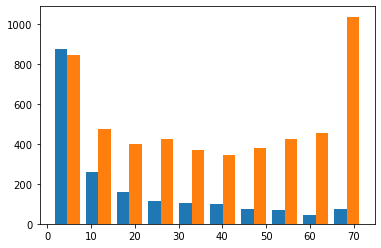

In [43]:
# Now we'll plot both of them side by side:
plt.hist([tenure_churn_yes, tenure_churn_no])

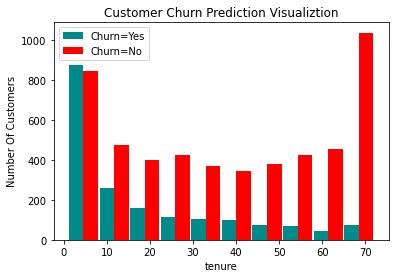

In [55]:
# To make the chart a little better with different colors, labels and legend:
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['DarkCyan','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

* So we see that the most number of customers (around 1000) with tenure = 70 are not living with the company. and less number of customer (around 100) with tenure = 70 are living with the company.
* So this kind of charts will help us to understand what is going on in the data.

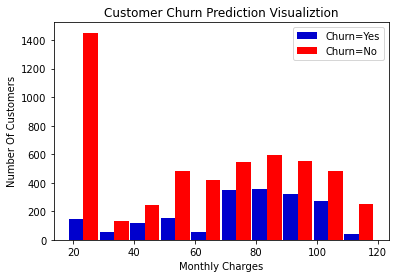

In [56]:
# We can plot same chart for 'monthly charges':
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['MediumBlue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

* This chart says that customers who have high charge almost close to 120 they are leaving more.
* Overall company is looking in trouble we would say.

In [58]:
# So for label encoding, we first need to know how many unique values we have in each column? So we run a for loop to each
# column and print the unique values:
for column in df:
    print(df[column].unique()) 

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [60]:
# To see the coressponding column names, we use python 'f format string':
for column in df:
    print(f'{column}: {df[column].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [61]:
# So now we put the upper [60] code in the function, because it will be used a lot later. And we also just print those 
# columns which has a data type of an object, because those are categorical columns, tenure or other columns which are 
# numerical, we skip them.
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [62]:
# We can call the function on df1 DataFrame:
print_unique_col_values(df1) # Will print all the unique values for all categorical columns.

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [63]:
# Here we see 'no internet service', so in reality it means 'no', so we will replace all these values into 'no'. 
# Similar if we have 'no phone service' it means 'no'.
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Habib\AppData\Local\Temp\ipykernel_2920\4258454685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Habib\AppData\Local\Temp\ipykernel_2920\4258454685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [64]:
# Now again to check:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [65]:
# So the next step is, we convert 'yes' and 'no' into the '1' and '0', because ML doesn't understand text, it knows numbers.
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Habib\AppData\Local\Temp\ipykernel_2920\753283413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [66]:
# Now again if we print the unique values, you will see that those 'yes' and 'no' are replaced by '1' and '0'.
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [68]:
# For 'gender' column we also apply '1' and '0' values.
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Habib\AppData\Local\Temp\ipykernel_2920\476850939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [69]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [70]:
# So for the remaining columns which have more than two columns we apply One Hot Encoding using get_dummies function:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [71]:
# So if randomly see some rows, we will see all the new created columns with their integer values:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3025,0,0,1,1,67,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
185,1,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2939,0,1,0,0,12,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1
4518,0,1,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3626,0,0,0,1,23,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [73]:
# To check the columns data types:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

* So we see all the datatypes are now numbers.

In [74]:
# So jump to the next step. In deep learning the scalling step is very important. If we look the data 'tenure' is in different range Vs other columns. Also if you see the monthly charges are also in differnt range.
# So we need to scal the data. So their are three columns I want to scal (cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']). The remaining columns are in range '1' and '0'.
# So we use 'MinMaxScaler', it will convert the values into [1,0] range. Then we call fit_transform method ont thats columns and back store then in the DataFrame.
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [75]:
# Now to check the changes:
df2.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
965,0,1,0,0,0.098592,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
6664,1,0,0,0,0.492958,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
5922,0,0,1,1,1.000000,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
5494,1,0,0,0,0.098592,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4161,0,1,0,0,0.014085,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
322,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [76]:
# We can also print the unique values by the way to see the changes:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [77]:
# So now the DataFrame is ready to be used in ML task. Before creating ML model, we need to do train and test. For that first we figure out the 'x' and 'y'.
# 'X' is all the columns except the 'churn' and 'Y' is 'churn'.
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [78]:
# So now let's call train_test_split method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [79]:
# Train shape is:
X_train.shape

(5625, 26)

In [80]:
# Test shape is:
X_test.shape

(1407, 26)

In [84]:
# The next step is to create the Neural Network.
# 
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.7305
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7908
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.7973
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8021
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8030
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8036
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8073
Epoch 8/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8087
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8075
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8084

In [85]:
# Now let's evaluate the model in X_test and y_test:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7726


[0.4626684784889221, 0.7725657224655151]

In [88]:
# Now let's compare the model prediction. 
# Let's first create y_predicted:
yp = model.predict(X_test)
yp[:10]

44/44 [==============================] - 0s 2ms/step


array([[0.25113472],
       [0.58112144],
       [0.01322465],
       [0.68576   ],
       [0.3515002 ],
       [0.835688  ],
       [0.04519729],
       [0.49220598],
       [0.25256303],
       [0.2402433 ]], dtype=float32)

In [89]:
# Let's see the y_test values:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

* We can comparet the model prediction with the truth acording to model accuracy.

In [90]:
# We can also convert the 2D array [88] into 1D, means any value which is greater than 0.50 will be 1 and other values will be 0.
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [91]:
# Now let's see the y_predicted 1D array:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [92]:
# To compare it with the y_test:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [94]:
# Now we want to print a classification report. I means statistics on Precision and recall.
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       999
           1       0.63      0.51      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

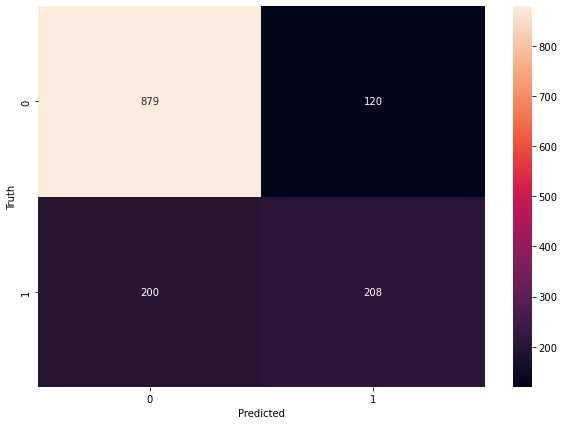

In [96]:
# Let's also see the confusion matrix:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
# So to see the model accuracy:
round((879+208)/(879+208+120+200),2)

0.77

In [98]:
# Precision for 0 class. i.e. Precision for customers who did not churn:
round(879/(879+200),2)

0.81

In [99]:
# Precision for 1 class. i.e. Precision for customers who actually churned:
round(208/(208+120),2)

0.63

In [100]:
# Recall for 0 class:
round(879/(879+120),2)

0.88

In [101]:
# Recall for 1 class:
round(200/(200+208),2)

0.49

### Exercise
Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 